In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
import pylab as pl
from scipy import stats
sns.set(color_codes=True)
import statistics
from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [435]:
mydata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [436]:
mydata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [356]:
mydata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [357]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIP Code             5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CD Account           5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [358]:
mydata.count()

ID                   5000
Age                  5000
Experience           5000
Income               5000
ZIP Code             5000
Family               5000
CCAvg                5000
Education            5000
Mortgage             5000
PersonalLoan         5000
SecuritiesAccount    5000
CD Account           5000
Online               5000
CreditCard           5000
dtype: int64

In [359]:
mydata.shape


(5000, 14)

In [360]:
mydata.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [361]:
mydata[pd.isnull]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CD Account,Online,CreditCard
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


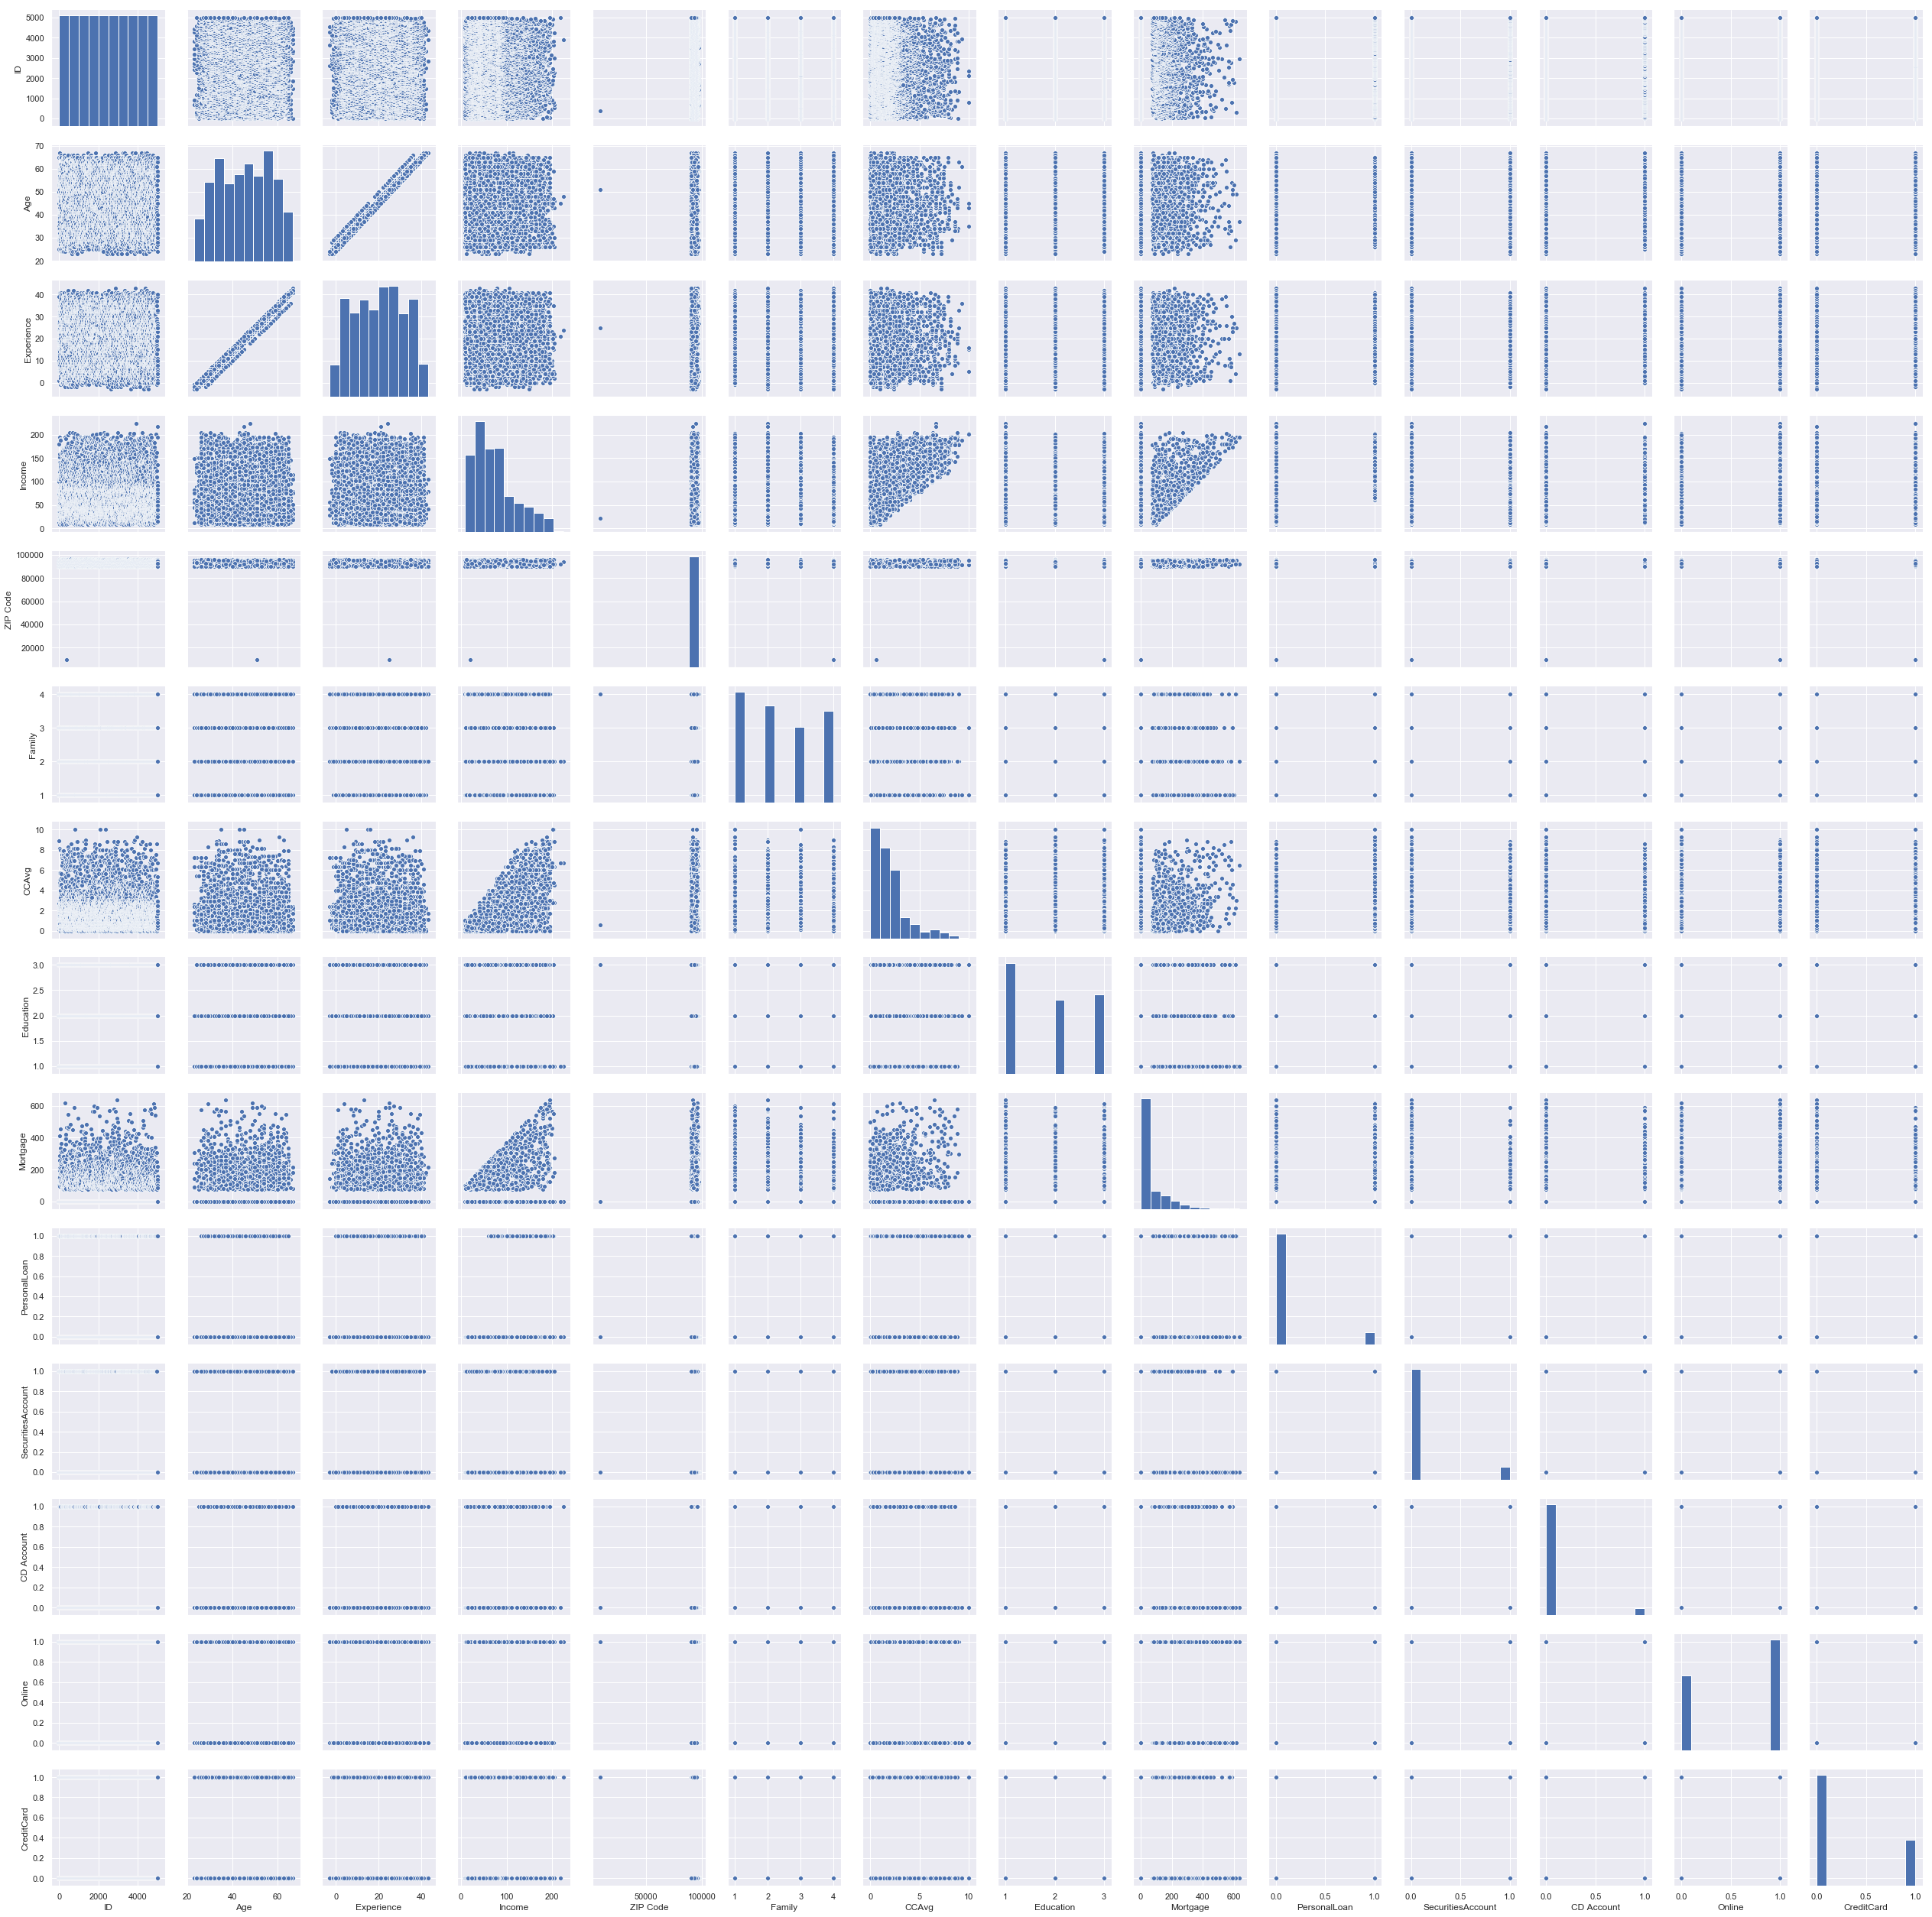

In [363]:
sns.pairplot(mydata)

In [364]:
mydata.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CD Account           0
Online               0
CreditCard           0
dtype: int64

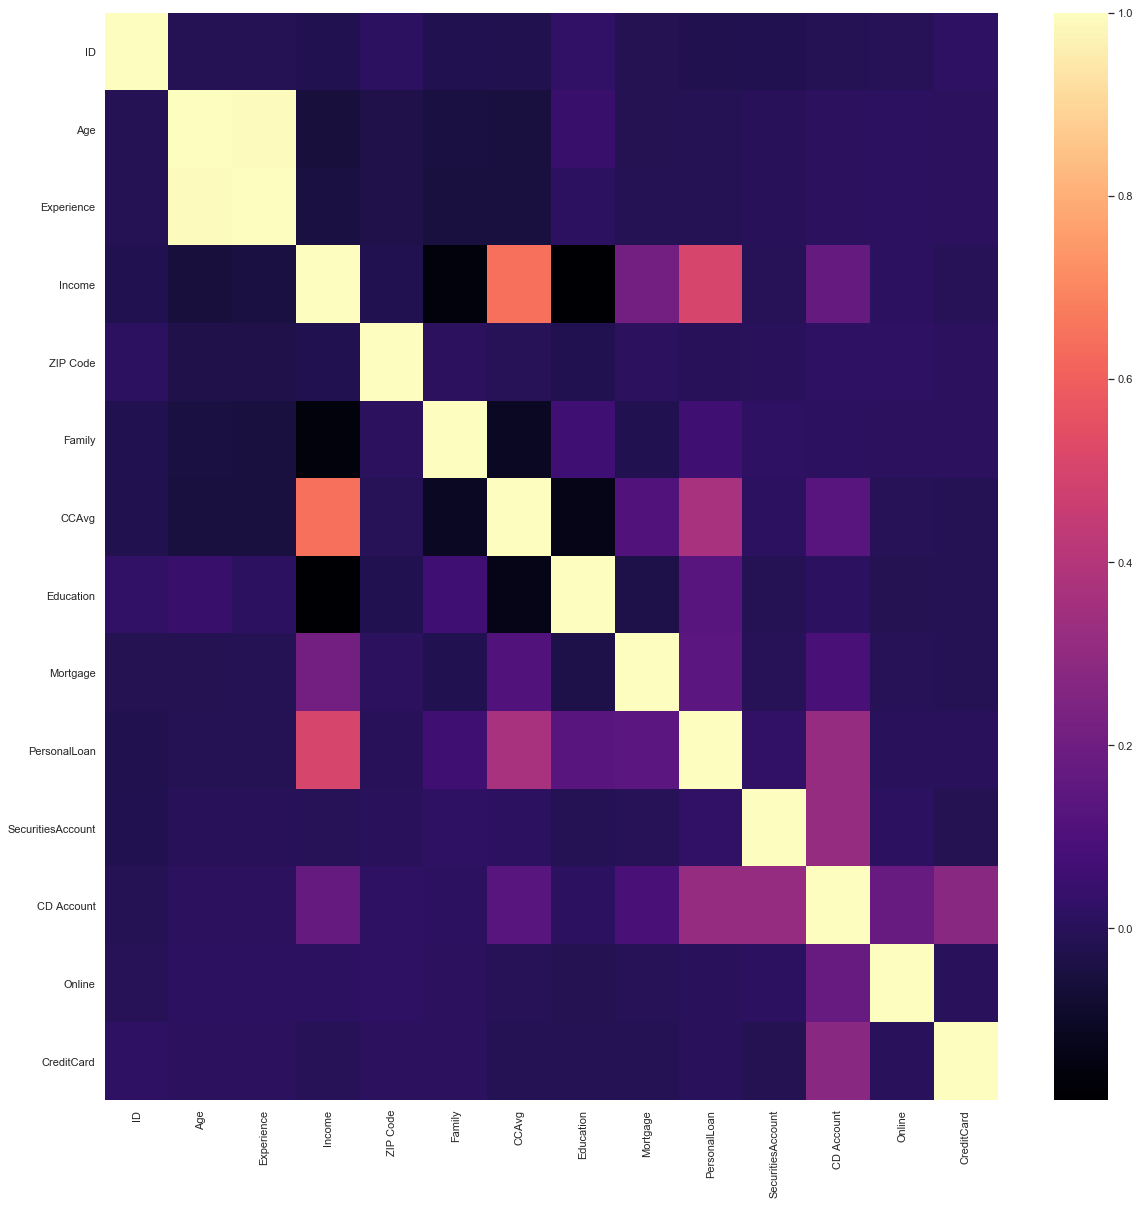

In [365]:
plt.figure(figsize=(20,20))
sns.heatmap(mydata.corr(),annot=False,cmap='magma')

In [366]:
mydata.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [367]:
mydata

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [368]:
#when seeing the data there are negitive data for Experience
mydata[mydata['Experience'] < 0]['Experience'].count()

52

In [369]:
#trying to get the negitive values.
dfExp = mydata.loc[mydata['Experience'] >0]
negExp = mydata.Experience < 0
column_name = 'Experience'
mylist = mydata.loc[negExp]['ID'].tolist()

In [370]:
#finding the negitive and positive values
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [371]:
#filling the negative values with median of the experience coloumn
for id in mylist:
    age = mydata.loc[np.where(mydata['ID']==id)]["Age"].tolist()[0]
    education = mydata.loc[np.where(mydata['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    mydata.loc[mydata.loc[np.where(mydata['ID']==id)].index, 'Experience'] = exp

In [418]:
mydata[mydata['Experience'] < 0]['Experience'].count()

0

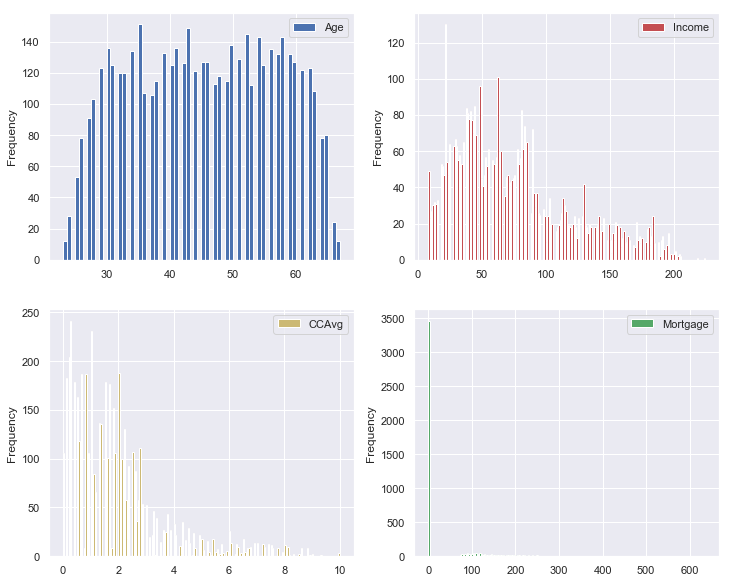

In [372]:
#understanding the distribution of the data.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
mydata.plot(kind="hist", y="Age", bins=70, color="b", ax=axes[0][0])
mydata.plot(kind="hist", y="Income", bins=200, color="r", ax=axes[0][1])
mydata.plot(kind="hist", y="CCAvg", bins=200, color="y", ax=axes[1][0])
mydata.plot(kind="hist", y="Mortgage", bins=200, color="g", ax=axes[1][1])

plt.show()

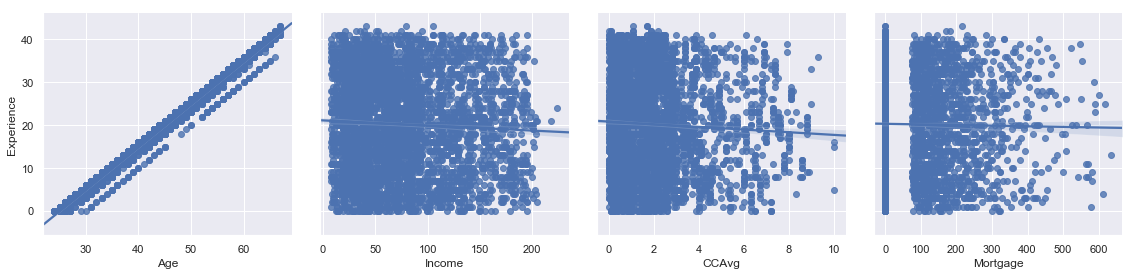

In [373]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(mydata, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

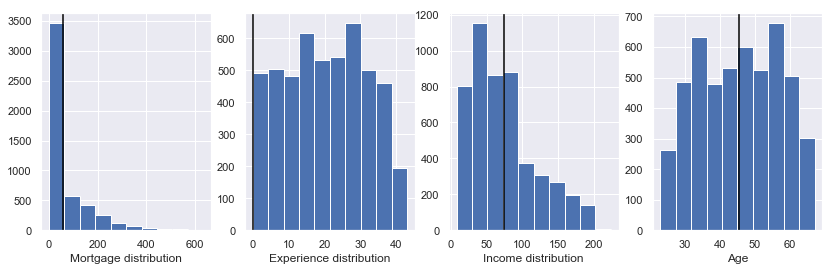

In [374]:
#Distribution of data with mean value.
fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize = (14,4))

ax0.hist(mydata.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(mydata.Mortgage.mean(), color = "black")

ax1.hist(mydata.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(mydata.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(mydata.Income.mean(), color = "black");

ax3.hist(mydata.Age)
ax3.set_xlabel('Age')
ax3.axvline(mydata.Age.mean(), color = "black");

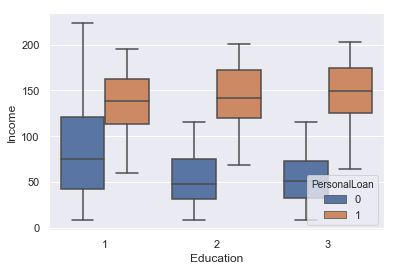

In [375]:
#Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=mydata)
#the below data tells the group1 with income has high education.

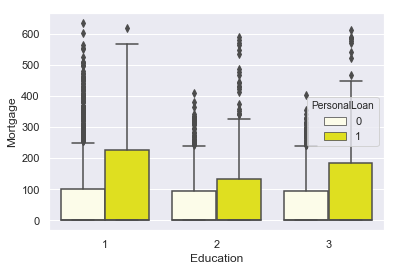

In [376]:
#Influence of Mortgage and education on personal loan
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data= mydata,color='yellow')
#the below data tells the group1 with group1 education has high mortgage .

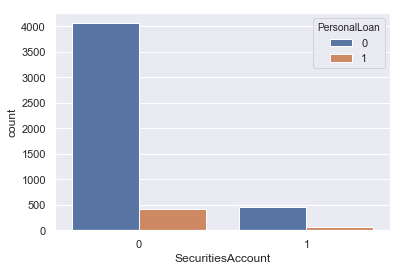

In [377]:
#Influence of Securities Account with personal loan
sns.countplot(x="SecuritiesAccount", data=mydata,hue="PersonalLoan")

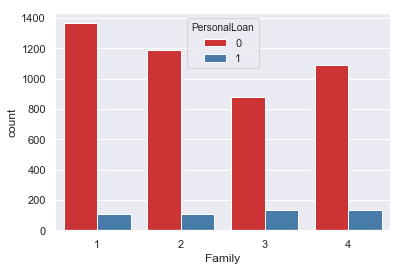

In [378]:
#Influence of Family with personal loan
sns.countplot(x='Family',data=mydata,hue='PersonalLoan',palette='Set1')

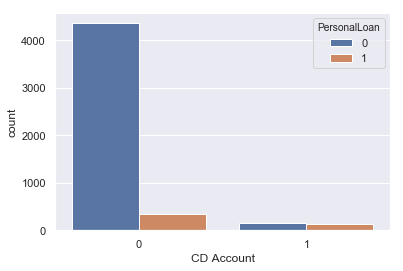

In [379]:
#Influence of CD Account with personal loan
sns.countplot(x='CD Account',data=mydata,hue='PersonalLoan')

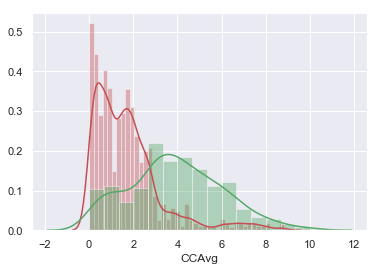

In [380]:
#Influence of CCAvg with personal loan
sns.distplot( mydata[mydata.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( mydata[mydata.PersonalLoan == 1]['CCAvg'], color = 'g')

In [381]:
# Credit card spending with non loan and loan customers:
print('Credit card spending of Non-Loan customers: ',mydata[mydata.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ',mydata[mydata.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0, 0.5, 'Age')

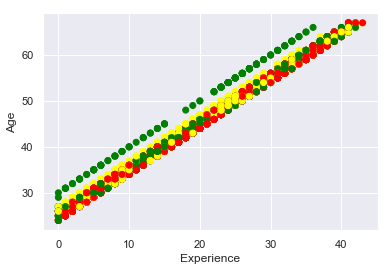

In [382]:
#Plotting with scatter plots with Experience Age and Education
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(mydata['Experience'],mydata['Age'],c=mydata['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

In [383]:
#concedering Personal Loan in our Target coloum, checnking the distridution for the following data values.

exp_df = mydata[['Income', 'CCAvg', 'Family', 'Education', 'CD Account', 'PersonalLoan']].copy()

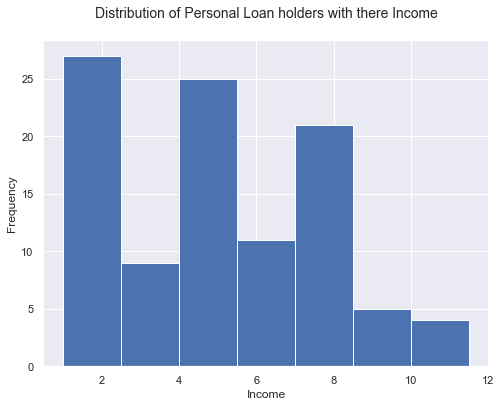

In [384]:
#income
series_inc = exp_df[exp_df['PersonalLoan'] == 1]['Income'].value_counts()
width = 1.5
series_inc.plot.hist(bins = np.arange(series_inc.min(), series_inc.max() + width, width ), figsize = (8,6))
plt.xlabel('Income')
plt.title('Distribution of Personal Loan holders with there Income', fontsize = 14, y = 1.05);
plt.savefig('Distrib_income_among_PL.png', bbox_inches = 'tight')

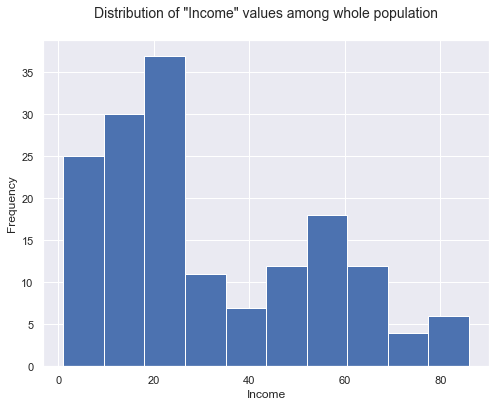

In [385]:
series_incc = exp_df['Income'].value_counts()
width = 8.5
series_incc.plot.hist(bins = np.arange(series_incc.min(), series_incc.max() + width, width ), figsize = (8,6))
plt.xlabel('Income')
plt.title('Distribution of "Income" values among whole population', fontsize = 14, y = 1.05);
plt.savefig('Distrib_income_among_population.png', bbox_inches = 'tight')

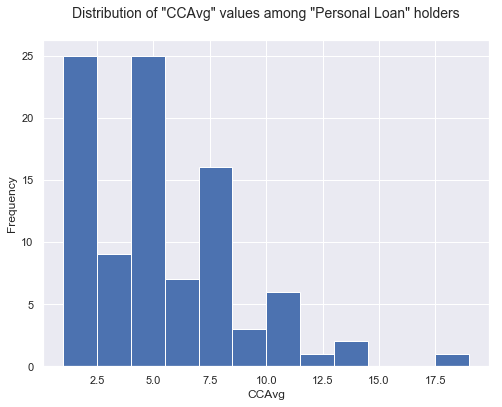

In [386]:
#CCAvg
series_cca = exp_df[exp_df['PersonalLoan'] == 1]['CCAvg'].value_counts()
width = 1.5 
series_cca.plot.hist(bins = np.arange(series_cca.min(), series_cca.max() + width, width ), figsize = (8,6))
plt.xlabel('CCAvg')
plt.title('Distribution of "CCAvg" values among "Personal Loan" holders', fontsize = 14, y = 1.05);
plt.savefig('Distrib_ccavg_among_PL.png', bbox_inches = 'tight')

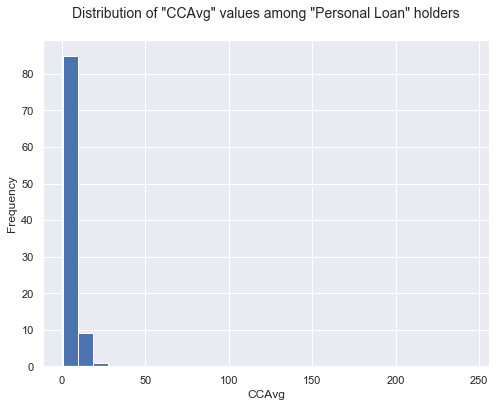

In [387]:
series_ccaa = exp_df['CCAvg'].value_counts()
width = 9
series_cca.plot.hist(bins = np.arange(series_ccaa.min(), series_ccaa.max() + width, width ), figsize = (8,6))
plt.xlabel('CCAvg')
plt.title('Distribution of "CCAvg" values among "Personal Loan" holders', fontsize = 14, y = 1.05);
plt.savefig('Distrib_ccavg_among_PL.png', bbox_inches = 'tight')


In [388]:
#Family
series_fam = exp_df[exp_df['PersonalLoan'] == 1]['Family'].value_counts()
series_fam

4    134
3    133
1    107
2    106
Name: Family, dtype: int64

In [389]:
series_famm = exp_df[exp_df['PersonalLoan'] == 0]['Family'].value_counts()
series_famm

1    1365
2    1190
4    1088
3     877
Name: Family, dtype: int64

In [390]:
series_fam_1 = exp_df[exp_df['Family'] == 1]['PersonalLoan'].value_counts()

In [391]:
series_fam_2 = exp_df[exp_df['Family'] == 2]['PersonalLoan'].value_counts()

In [392]:
series_fam_3 = exp_df[exp_df['Family'] == 3]['PersonalLoan'].value_counts()

In [393]:
series_fam_4 = exp_df[exp_df['Family'] == 4]['PersonalLoan'].value_counts()

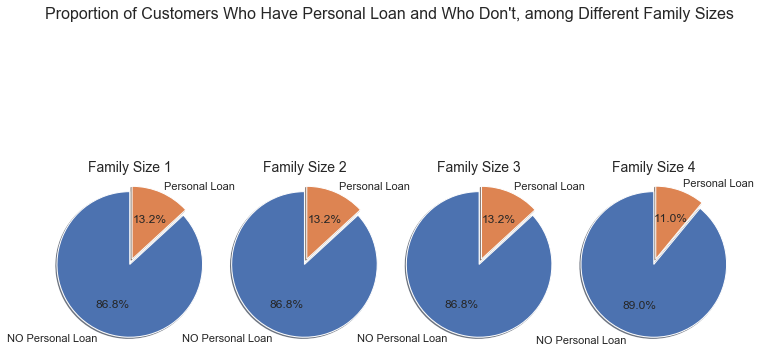

In [394]:
labels = ['NO Personal Loan','Personal Loan']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (12,6),subplot_kw=dict(aspect="equal"))
fig.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, \
among Different Family Sizes', fontsize = 16, y = 1.1, x = 0.51);

ax1.pie(series_fam_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Family Size 1',fontsize = 14, y = 1.1)

ax2.pie(series_fam_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Family Size 2',fontsize = 14, y = 1.1)

ax3.pie(series_fam_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax3.set_title('Family Size 3',fontsize = 14, y = 1.1)

ax4.pie(series_fam_4, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax4.set_title('Family Size 4', fontsize = 14, y = 1.1);

plt.savefig('Proportion_of_PL_among_family_levels.png', bbox_inches = 'tight');

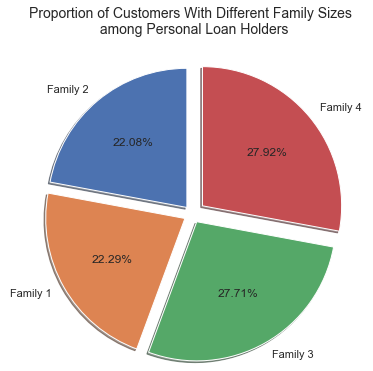

In [395]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Family Sizes \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Family 2',' Family 1','Family 3','Family 4']
plt.pie(series_fam.sort_values(ascending = True), labels = labels, \
        autopct= '%1.2f%%', shadow = True, explode = (0.1, 0.1, 0.1,0.15), radius = 1.6, startangle = 90);
plt.savefig('Proportion_family_size_among_PL.png', bbox_inches = 'tight');

In [396]:
series_ed = exp_df[exp_df['PersonalLoan'] == 1]['Education'].value_counts()
series_ed

3    205
2    182
1     93
Name: Education, dtype: int64

In [397]:
series_edd = exp_df[exp_df['PersonalLoan'] == 0]['Education'].value_counts()
series_edd

1    2003
3    1296
2    1221
Name: Education, dtype: int64

In [398]:
series_edu_1 = exp_df[exp_df['Education'] == 1]['PersonalLoan'].value_counts()

In [399]:
series_edu_2 = exp_df[exp_df['Education'] == 2]['PersonalLoan'].value_counts()

In [400]:
series_edu_3 = exp_df[exp_df['Education'] == 3]['PersonalLoan'].value_counts()

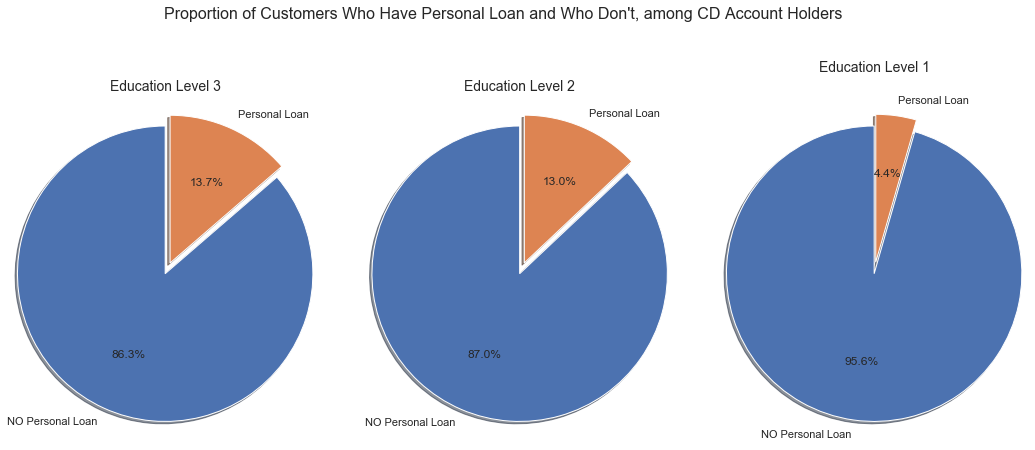

In [401]:
labels = ['NO Personal Loan','Personal Loan']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,6),subplot_kw=dict(aspect="equal"))
plt.axis('equal')
ax1.pie(series_edu_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Education Level 3',fontsize = 14, y = 1.1)

ax2.pie(series_edu_2, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Education Level 2', fontsize = 14, y = 1.1)

ax3.pie(series_edu_1, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90);
ax3.set_title('Education Level 1',fontsize = 14, y = 1.1)

plt.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, among CD Account Holders', \
             fontsize = 16, y = 1.12);

plt.savefig('Proportion_of_PL_among edu_levels.png', bbox_inches = 'tight');

In [402]:
series_edu_4 = exp_df[exp_df['PersonalLoan'] == 1]['Education'].value_counts()
series_edu_4

3    205
2    182
1     93
Name: Education, dtype: int64

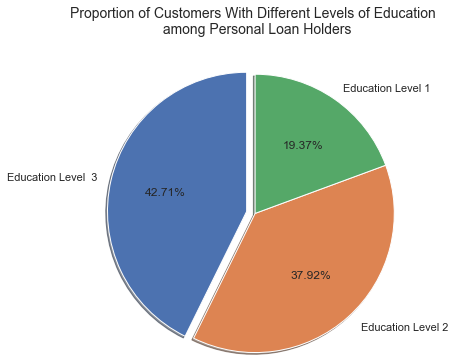

In [403]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Education Level  3',' Education Level 2','Education Level 1']
plt.pie(series_edu_4, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_among_PL.png', bbox_inches = 'tight');

In [404]:
#CD Account
series_cd = exp_df[exp_df['PersonalLoan'] == 1]['CD Account'].value_counts()
series_cd

0    340
1    140
Name: CD Account, dtype: int64

In [405]:
series_cdd = exp_df[exp_df['PersonalLoan'] == 0]['CD Account'].value_counts()
series_cdd

0    4358
1     162
Name: CD Account, dtype: int64

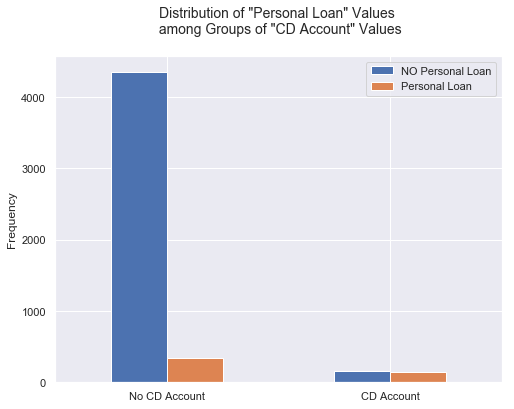

In [406]:
pd.DataFrame(dict( NO_PL= series_cdd, PL= series_cd,)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xticks(np.arange(2),('No CD Account','CD Account'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'));
plt.title('Distribution of "Personal Loan" Values \n among Groups of "CD Account" Values', fontsize = 14, y = 1.05);
plt.savefig('distribution_of_PL_among_CDacc.png', bbox_inches = 'tight')

In [407]:
series = exp_df[exp_df['CD Account'] == 1]['PersonalLoan'].value_counts()

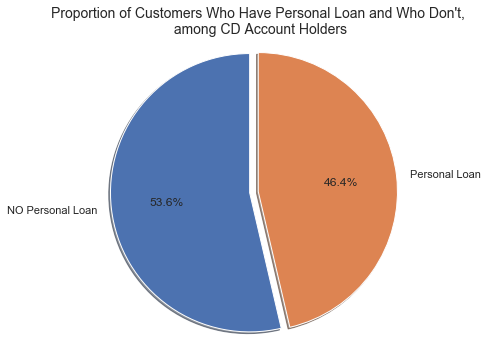

In [408]:
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(series, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), radius = 1.6, startangle = 90)
plt.savefig('Proportion_of_loanees_among_depositees.png', bbox_inches = 'tight');

#Splitting the value with 70:30 ratio with train and test

In [437]:

array = mydata.values
X = mydata.iloc[:,0:13]
y = mydata.iloc[:,13]
test_size = 0.30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5000)

Applying the dataset to models (Logistic, KNN, and NB)

In [439]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

t=list(X_train.columns)

coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


         ID       Age  Experience    Income  ZIP Code    Family     CCAvg  \
0  0.000033  0.000605    0.000672 -0.000462  -0.00001  0.000061  0.000017   

   Education  Mortgage  PersonalLoan  SecuritiesAccount  CD Account    Online  \
0  -0.000091 -0.000258     -0.000012          -0.000027    0.000228  0.000028   

      intercept  
0 -9.791951e-07  


In [411]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1044   15]
 [ 359   82]]


In [412]:


model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

NotFittedError: This LogisticRegression instance is not fitted yet

In [414]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """
C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [415]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [416]:
from sklearn.neighbors import KNeighborsClassifier
#trying with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

In [ ]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.plot(range(1,40), error_rate, marker='o', markerfacecolor='red', linestyle='dashed', color='green', markersize=10)
plt.title('Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

In [ ]:
knn.score(X_train, y_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#fitting train data in the classifier
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = classifier.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [ ]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Logistic', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5000)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
Naive Bayes has the Highest Accuracy 